In [1]:
import pandas as pd

In [2]:
path = "data/SPX_database_2010.xlsx"

df_total_ret = pd.read_excel(path, sheet_name='total_ret')

In [3]:
df_total_ret.head()

,Dates,LYB UN Equity,AXP UN Equity,VZ UN Equity,TPL UN Equity,AVGO UW Equity,BA UN Equity,SOLV UN Equity,CAT UN Equity,JPM UN Equity,...,WY UN Equity.1,WYNN UW Equity.1,XEL UW Equity.1,XOM UN Equity.1,XYL UN Equity.1,XYZ UN Equity.1,YUM UN Equity.1,ZBH UN Equity.1,ZBRA UW Equity.1,ZTS UN Equity.1
0,2010-01-01,NaN,45.7541,47.1902,11.26,1.829,65.363,NaN,73.9167,58.4516,...,24.0325,68.8199,NaN,84.7537,NaN,NaN,27.3910,57.3440,28.36,NaN
1,2010-01-04,NaN,46.2057,47.4038,10.88,1.886,67.838,NaN,75.9401,60.1769,...,24.6676,75.5920,NaN,85.9468,NaN,NaN,27.4850,58.2268,28.67,NaN
2,2010-01-05,NaN,46.1041,47.4893,11.30,1.900,70.060,NaN,76.8480,61.3425,...,25.1912,80.1895,NaN,86.2824,NaN,NaN,27.3910,60.0700,28.62,NaN
3,2010-01-06,NaN,46.8494,46.1432,11.17,1.915,72.185,NaN,77.0815,61.6796,...,24.9127,79.1376,NaN,87.0282,NaN,NaN,27.1952,60.0506,28.40,NaN
4,2010-01-07,NaN,47.6059,45.8686,11.11,1.903,75.108,NaN,77.3927,62.9014,...,24.8013,80.8277,NaN,86.7547,NaN,NaN,27.1874,61.4282,27.69,NaN


In [4]:
def clean_column_names(df):
    """Extract ticker symbols from column names like 'ABBV UN Equity' -> 'ABBV'"""
    new_columns = []
    for col in df.columns:
        if ' UN Equity' in str(col):
            ticker = col.split(' UN Equity')[0]
            new_columns.append(ticker)
        elif ' UW Equity' in str(col):
            ticker = col.split(' UW Equity')[0]
            new_columns.append(ticker)
        else:
            new_columns.append(col)
    return new_columns

df_total_ret.columns = clean_column_names(df_total_ret)

print("Sample of cleaned column names:")
print("df_prices columns:", df_total_ret.columns[:10].tolist())


Sample of cleaned column names:
df_prices columns: ['Dates', 'LYB', 'AXP', 'VZ', 'TPL', 'AVGO', 'BA', 'SOLV', 'CAT', 'JPM']


In [5]:
tickers = [
    "MSFT", "AAPL", "NVDA", "GOOGL", "IBM",
    "AVGO", "ADBE", "CRM", "INTC", "INTU",
    "UNH", "PFE", "LLY", "ABT", "MRK",
    "MCD", "AMZN", "COST", "SBUX", "PG",
    "JPM", "GS", "MS", "BLK", "CAT",
    "DE", "GE", "XOM", "NEE", "ETN"
]

# Select only the date column and the tickers we want
df_total_ret = df_total_ret[['Dates'] + tickers]
df_total_ret.set_index('Dates', inplace=True)

# Remove any duplicate columns
df_total_ret = df_total_ret.loc[:, ~df_total_ret.columns.duplicated()]

df_total_ret.head()


,MSFT,AAPL,NVDA,GOOGL,IBM,AVGO,ADBE,CRM,INTC,INTU,...,JPM,GS,MS,BLK,CAT,DE,GE,XOM,NEE,ETN
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-01,37.2233,7.5307,0.4670,15.515,138.9694,1.829,37.034,18.4425,23.2758,30.71,...,58.4516,183.162,35.7589,257.763,73.9167,65.9404,96.9910,84.7537,18.9076,40.5340
2010-01-04,37.7849,7.6493,0.4622,15.684,140.6150,1.886,37.346,18.7050,23.8235,30.81,...,60.1769,187.762,37.3415,264.846,75.9401,68.3420,99.0424,85.9468,19.0616,40.9799
2010-01-05,37.7971,7.6564,0.4690,15.615,138.9164,1.900,37.960,18.6250,23.8121,30.81,...,61.3425,191.081,38.7066,265.989,76.8480,68.0860,99.5552,86.2824,18.8754,40.7378
2010-01-06,37.5651,7.5346,0.4720,15.221,138.0140,1.915,37.880,18.5925,23.7322,30.38,...,61.6796,189.042,39.2019,260.505,77.0815,67.9031,99.0424,87.0282,19.0616,40.5594
2010-01-07,37.2111,7.5207,0.4628,14.867,137.5362,1.903,37.145,18.5100,23.5040,30.28,...,62.9014,192.741,39.7697,263.369,77.3927,68.3908,104.1708,86.7547,19.0079,41.1583


In [6]:
# Calculate daily returns from the total return index
df_daily_ret = df_total_ret.pct_change().dropna()

print("Daily returns shape:", df_daily_ret.shape)
print("Number of stocks:", len(df_daily_ret.columns))
df_daily_ret.head()


Daily returns shape: (4065, 30)
Number of stocks: 30


,MSFT,AAPL,NVDA,GOOGL,IBM,AVGO,ADBE,CRM,INTC,INTU,...,JPM,GS,MS,BLK,CAT,DE,GE,XOM,NEE,ETN
Dates,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.015087,0.015749,-0.010278,0.010893,0.011841,0.031165,0.008425,0.014233,0.023531,0.003256,...,0.029517,0.025114,0.044258,0.027479,0.027374,0.036421,0.021150,0.014077,0.008145,0.011001
2010-01-05,0.000323,0.000928,0.014712,-0.004399,-0.012080,0.007423,0.016441,-0.004277,-0.000479,0.000000,...,0.019370,0.017677,0.036557,0.004316,0.011955,-0.003746,0.005178,0.003905,-0.009768,-0.005908
2010-01-06,-0.006138,-0.015908,0.006397,-0.025232,-0.006496,0.007895,-0.002107,-0.001745,-0.003355,-0.013957,...,0.005495,-0.010671,0.012796,-0.020617,0.003038,-0.002686,-0.005151,0.008644,0.009865,-0.004379
2010-01-07,-0.009424,-0.001845,-0.019492,-0.023257,-0.003462,-0.006266,-0.019403,-0.004437,-0.009616,-0.003292,...,0.019809,0.019567,0.014484,0.010994,0.004037,0.007182,0.051780,-0.003143,-0.002817,0.014766
2010-01-08,0.005904,0.006648,0.002161,0.013318,0.010035,0.007357,-0.005438,0.001486,0.011164,0.026420,...,-0.002456,-0.018911,-0.020352,0.007040,0.011228,0.027273,0.021539,-0.004011,-0.008665,0.022447


In [7]:
df_daily_ret.tail()

,MSFT,AAPL,NVDA,GOOGL,IBM,AVGO,ADBE,CRM,INTC,INTU,...,JPM,GS,MS,BLK,CAT,DE,GE,XOM,NEE,ETN
Dates,,,,,,,,,,,,,,,,,,,,,
2025-07-28,-0.002355,0.000795,0.018732,-0.003108,0.013438,0.014198,-0.003426,0.004236,-0.000966,0.016260,...,-0.001139,-0.007311,-0.003147,-0.004861,-0.001867,-0.013201,-0.003609,0.009420,-0.007098,0.001504
2025-07-29,0.000137,-0.012987,-0.007015,0.016465,-0.003040,0.010601,0.003328,-0.010583,-0.013056,0.009527,...,-0.004157,0.011512,0.007015,0.003319,-0.006675,0.003819,-0.001108,0.012922,0.008550,-0.007002
2025-07-30,0.001307,-0.010508,0.021423,0.003981,-0.008193,0.017484,-0.018073,-0.009649,-0.003428,0.001303,...,0.008719,-0.001681,0.009613,-0.006135,0.009464,-0.009034,0.011986,-0.008682,-0.013342,0.000205
2025-07-31,0.039475,-0.007079,-0.007809,-0.023559,-0.027319,-0.029476,-0.017334,-0.024470,-0.026549,-0.027571,...,-0.011314,-0.009797,-0.010211,-0.007751,0.008984,0.032489,-0.009029,-0.002324,0.000986,-0.013766
2025-08-01,-0.019072,-0.024859,-0.029853,-0.016151,-0.021963,-0.018896,-0.020691,-0.030349,-0.031060,-0.014099,...,-0.023089,-0.021822,-0.029763,-0.017622,-0.024428,-0.042089,-0.009518,-0.016303,-0.006473,-0.015856


In [8]:
# Load SOFR (risk-free rate) data
df_sofr = pd.read_excel("data/SOFR.xlsx")
df_sofr.rename(columns={"Data": "Dates"}, inplace=True)
df_sofr["Dates"] = pd.to_datetime(df_sofr["Dates"]) 
df_sofr = df_sofr.set_index("Dates").sort_index()
df_sofr["Taxa_diaria"] = ((1 + df_sofr["Price"]) ** (1/252)) - 1
df_sofr = df_sofr[(df_sofr.index.year >= 2000)]

print("SOFR data loaded successfully")
print(f"Date range: {df_sofr.index.min()} to {df_sofr.index.max()}")
print(f"\nFirst few rows:")
df_sofr.head()

SOFR data loaded successfully
Date range: 2014-01-02 00:00:00 to 2025-08-01 00:00:00

First few rows:


,Price,Taxa_diaria
Dates,,
2014-01-02,0.0005,0.000002
2014-01-03,0.0005,0.000002
2014-01-06,0.0005,0.000002
2014-01-07,0.0004,0.000002
2014-01-08,0.0004,0.000002


Rebalance these portfolios in the first day of the month based on the information on the last day (1-day lag)

In [9]:
# Calculate equal weights for all stocks
num_stocks = len(df_daily_ret.columns)
ew_weights = pd.Series(1 / num_stocks, index=df_daily_ret.columns)

print(f"Number of stocks: {num_stocks}")
print(f"Weight per stock: {1/num_stocks:.4f}")
print("\nFirst few weights:")
print(ew_weights.head())


Number of stocks: 30
Weight per stock: 0.0333

First few weights:
MSFT     0.033333
AAPL     0.033333
NVDA     0.033333
GOOGL    0.033333
IBM      0.033333
dtype: float64


In [10]:
def equally_weighted_portfolio(df_daily_returns):
    """
    Calculate equally weighted portfolio performance using daily returns.
    
    Parameters:
    -----------
    df_daily_returns : pd.DataFrame
        DataFrame with daily returns for each stock
    
    Returns:
    --------
    portfolio : pd.DataFrame
        DataFrame with portfolio daily returns, cumulative value, and cumulative return
    """
    # Create a copy to avoid modifying original data
    portfolio = pd.DataFrame(index=df_daily_returns.index)
    
    # Calculate equal weight
    num_stocks = len(df_daily_returns.columns)
    weight = 1 / num_stocks
    
    # Calculate portfolio daily returns as weighted average of stock returns
    portfolio['Daily Return'] = df_daily_returns.mul(weight).sum(axis=1)
    
    # Calculate cumulative portfolio value (starting from 1)
    portfolio['Portfolio Value'] = (1 + portfolio['Daily Return']).cumprod()
    
    # Calculate cumulative return
    portfolio['Cumulative Return'] = portfolio['Portfolio Value'] - 1
    
    return portfolio


# Create the equally weighted portfolio
ew_portfolio = equally_weighted_portfolio(df_daily_ret)

print("Portfolio Statistics:")
print(f"Initial Value: {ew_portfolio['Portfolio Value'].iloc[0]:.4f}")
print(f"Final Value: {ew_portfolio['Portfolio Value'].iloc[-1]:.4f}")
print(f"Total Return: {ew_portfolio['Cumulative Return'].iloc[-1]:.2%}")
print(f"\nFirst few rows:")
ew_portfolio.head()


Portfolio Statistics:
Initial Value: 1.0160
Final Value: 16.6191
Total Return: 1561.91%

First few rows:


,Daily Return,Portfolio Value,Cumulative Return
Dates,,,
2010-01-04,0.016025,1.016025,0.016025
2010-01-05,0.002658,1.018725,0.018725
2010-01-06,-0.002066,1.016620,0.016620
2010-01-07,0.001752,1.018402,0.018402
2010-01-08,0.004146,1.022625,0.022625


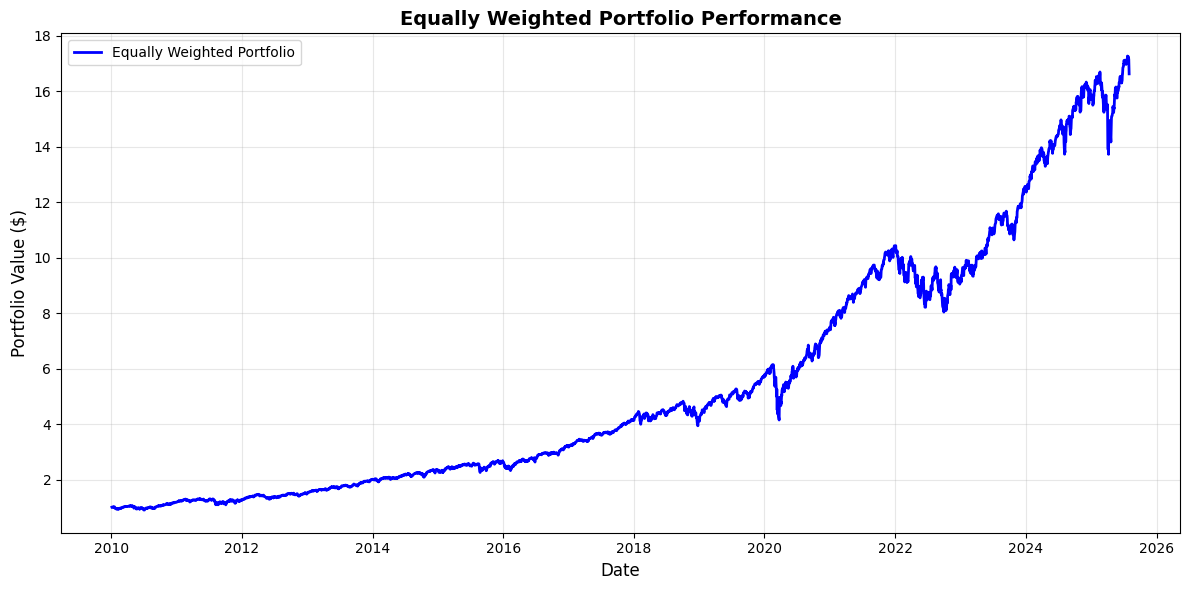

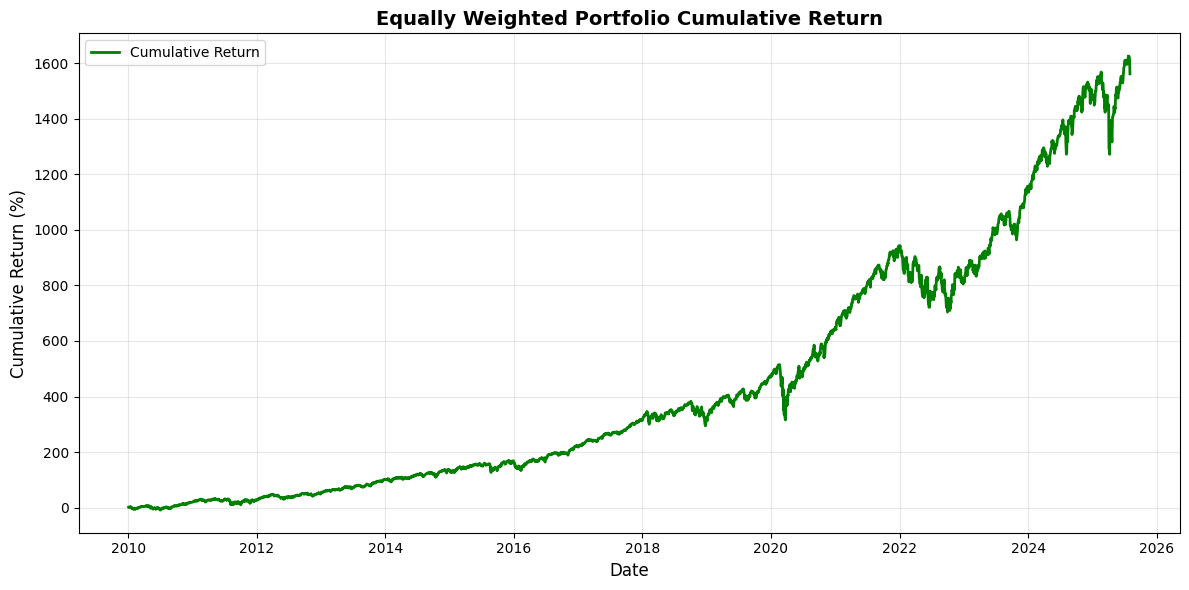

In [11]:
import matplotlib.pyplot as plt

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(ew_portfolio.index, ew_portfolio['Portfolio Value'], label='Equally Weighted Portfolio', color='blue', linewidth=2)
plt.title('Equally Weighted Portfolio Performance', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(ew_portfolio.index, ew_portfolio['Cumulative Return'] * 100, label='Cumulative Return', color='green', linewidth=2)
plt.title('Equally Weighted Portfolio Cumulative Return', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [12]:
# Portfolio performance metrics
def calculate_portfolio_metrics(portfolio, rf_daily_series=None):
    """Calculate key performance metrics for the portfolio
    
    Parameters:
    -----------
    portfolio : pd.DataFrame
        DataFrame with portfolio daily returns
    rf_daily_series : pd.Series, optional
        Series with daily risk-free rates aligned to portfolio dates
        If None, uses a fixed 3% annual rate
    """
    
    # Annualized return
    daily_returns = portfolio['Daily Return']
    annualized_return = daily_returns.mean() * 252
    
    # Annualized volatility (standard deviation)
    annualized_vol = daily_returns.std() * (252 ** 0.5)
    
    # Sharpe ratio
    if rf_daily_series is not None:
        # Use actual risk-free rates aligned with portfolio dates
        common_dates = daily_returns.index.intersection(rf_daily_series.index)
        excess_returns = daily_returns.loc[common_dates] - rf_daily_series.loc[common_dates]
        sharpe_ratio = (excess_returns.mean() * 252) / (daily_returns.loc[common_dates].std() * (252 ** 0.5))
    else:
        # Fall back to fixed 3% annual rate
        r_rf_annual = 0.03
        r_rf_daily = r_rf_annual / 252
        excess_returns = daily_returns - r_rf_daily
        sharpe_ratio = (excess_returns.mean() * 252) / (daily_returns.std() * (252 ** 0.5))
    
    # Total return
    total_return = portfolio['Cumulative Return'].iloc[-1]
    
    # Max drawdown
    cumulative = (1 + daily_returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return {
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_vol,
        'Sharpe Ratio': sharpe_ratio,
        'Total Return': total_return,
        'Max Drawdown': max_drawdown
    }

# Align SOFR data with portfolio dates
rf_daily = df_sofr['Taxa_diaria'].reindex(ew_portfolio.index, method='ffill')

# Calculate metrics using actual SOFR rates
metrics = calculate_portfolio_metrics(ew_portfolio, rf_daily)

print("=" * 50)
print("EQUALLY WEIGHTED PORTFOLIO METRICS")
print("(Using SOFR as Risk-Free Rate)")
print("=" * 50)
for metric, value in metrics.items():
    if 'Return' in metric or 'Drawdown' in metric or 'Volatility' in metric:
        print(f"{metric:.<30} {value:>8.2%}")
    else:
        print(f"{metric:.<30} {value:>8.2f}")
print("=" * 50)

EQUALLY WEIGHTED PORTFOLIO METRICS
(Using SOFR as Risk-Free Rate)
Annualized Return.............   19.03%
Annualized Volatility.........   17.85%
Sharpe Ratio..................     0.98
Total Return.................. 1561.91%
Max Drawdown..................  -32.42%


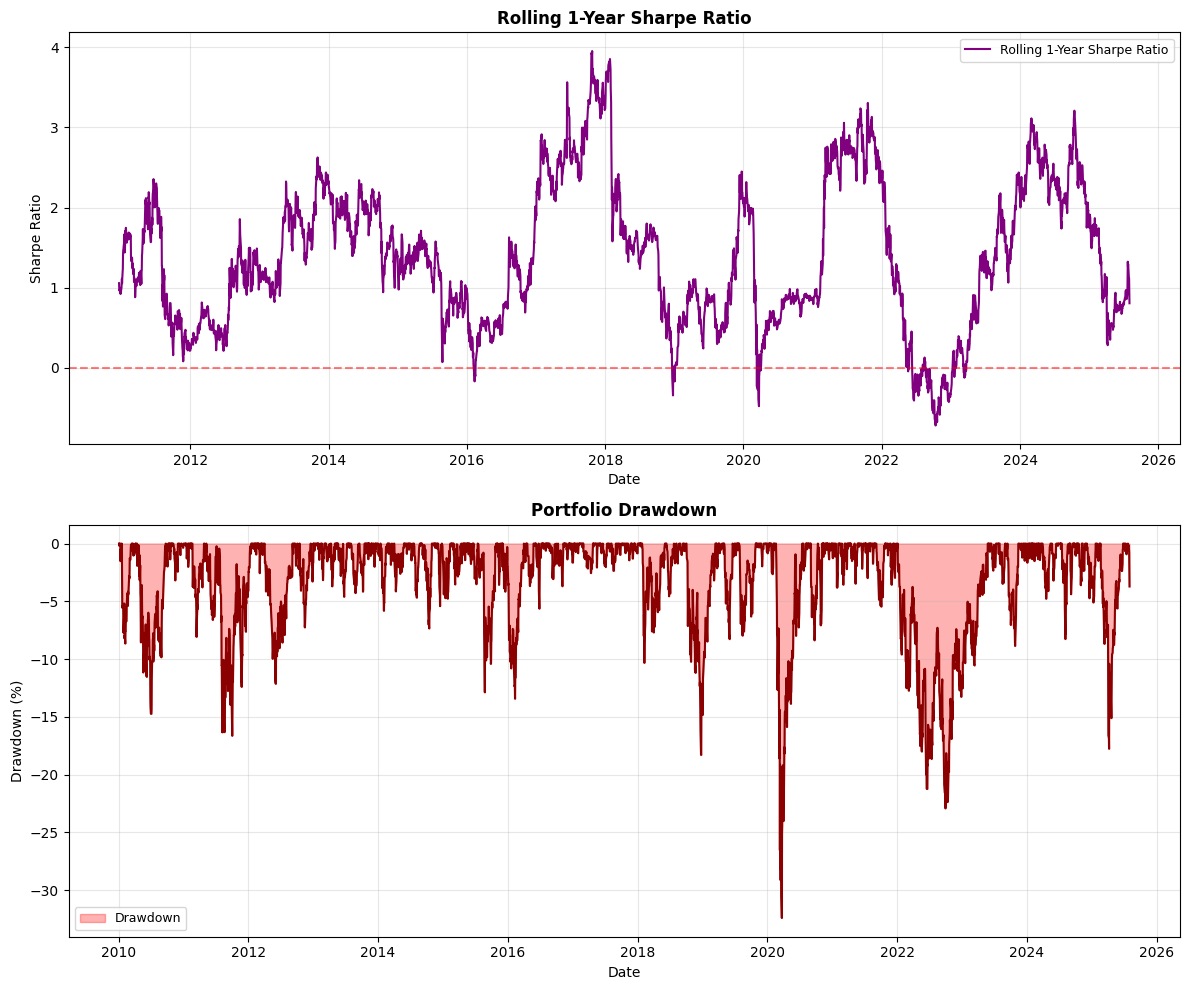

In [13]:
# Additional visualizations - Rolling metrics

# Calculate rolling 252-day (1 year) Sharpe ratio
rolling_window = 252
rolling_returns = ew_portfolio['Daily Return'].rolling(window=rolling_window)
rolling_mean = rolling_returns.mean() * 252
rolling_std = rolling_returns.std() * (252 ** 0.5)
rolling_sharpe = rolling_mean / rolling_std

# Calculate rolling drawdown
cumulative = (1 + ew_portfolio['Daily Return']).cumprod()
running_max = cumulative.expanding().max()
drawdown = (cumulative - running_max) / running_max

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Rolling Sharpe Ratio
axes[0].plot(ew_portfolio.index, rolling_sharpe, label='Rolling 1-Year Sharpe Ratio', color='purple', linewidth=1.5)
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].set_title('Rolling 1-Year Sharpe Ratio', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=10)
axes[0].set_ylabel('Sharpe Ratio', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Drawdown
axes[1].fill_between(ew_portfolio.index, drawdown * 100, 0, color='red', alpha=0.3, label='Drawdown')
axes[1].plot(ew_portfolio.index, drawdown * 100, color='darkred', linewidth=1.5)
axes[1].set_title('Portfolio Drawdown', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=10)
axes[1].set_ylabel('Drawdown (%)', fontsize=10)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Annual Returns:
2010:     19.02%
2011:      6.30%
2012:     19.23%
2013:     34.01%
2014:     15.57%
2015:     13.06%
2016:     20.41%
2017:     30.14%
2018:      2.51%
2019:     34.60%
2020:     31.29%
2021:     38.22%
2022:    -11.45%
2023:     36.70%
2024:     25.23%
2025:      5.78%


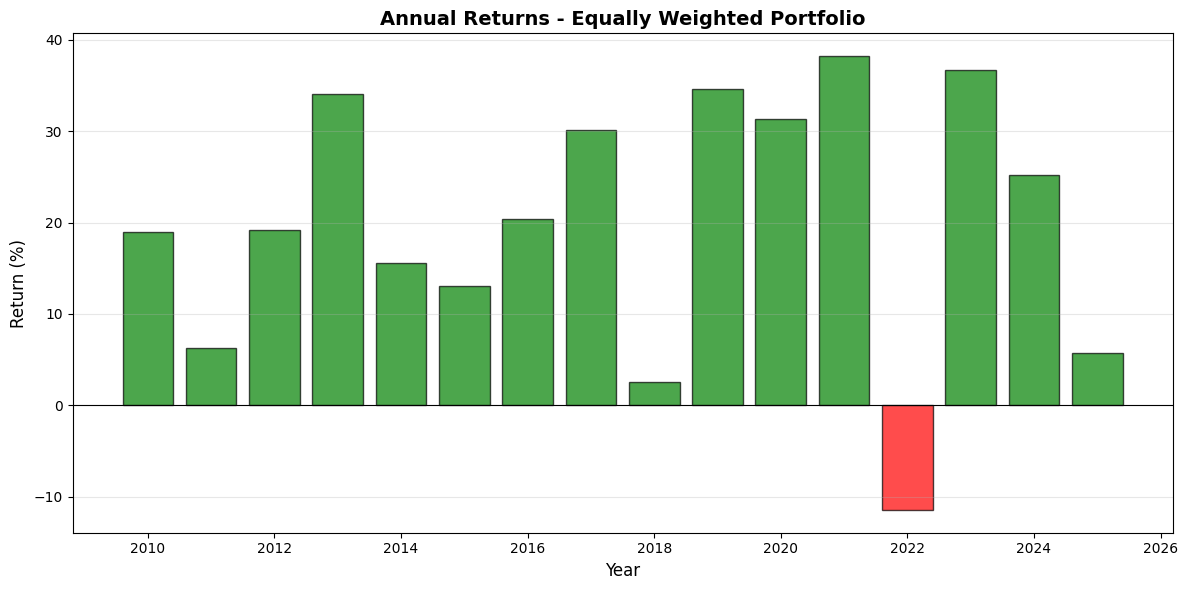

In [14]:
# Annual returns breakdown
ew_portfolio_annual = ew_portfolio.copy()
ew_portfolio_annual['Year'] = ew_portfolio_annual.index.year

annual_returns = ew_portfolio_annual.groupby('Year')['Daily Return'].apply(
    lambda x: (1 + x).prod() - 1
)

print("Annual Returns:")
print("=" * 40)
for year, ret in annual_returns.items():
    print(f"{year}: {ret:>10.2%}")
print("=" * 40)

# Plot annual returns
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in annual_returns]
plt.bar(annual_returns.index, annual_returns * 100, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.title('Annual Returns - Equally Weighted Portfolio', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [15]:
# Compare with S&P 500 benchmark (optional - requires yfinance)
try:
    import yfinance as yf
    
    # Get S&P 500 data for the same period
    start_date = ew_portfolio.index[0].strftime('%Y-%m-%d')
    end_date = ew_portfolio.index[-1].strftime('%Y-%m-%d')
    
    print(f"Downloading S&P 500 data from {start_date} to {end_date}...")
    sp500_data = yf.download("^GSPC", start=start_date, end=end_date, progress=False)
    
    # For single ticker, yfinance returns simple column names
    if 'Adj Close' in sp500_data.columns:
        sp500_prices = sp500_data['Adj Close']
    elif 'Close' in sp500_data.columns:
        sp500_prices = sp500_data['Close']
    else:
        # If multi-index, get the first level
        sp500_prices = sp500_data.iloc[:, sp500_data.columns.get_loc('Adj Close')]
    
    # Calculate S&P 500 returns
    sp500_returns = sp500_prices.pct_change().dropna()
    
    # Align dates with portfolio
    common_dates = ew_portfolio.index.intersection(sp500_returns.index)
    
    print(f"Matched {len(common_dates)} common trading days")
    
    # Calculate S&P 500 portfolio value
    sp500_portfolio = pd.DataFrame(index=common_dates)
    sp500_portfolio['Daily Return'] = sp500_returns.loc[common_dates]
    sp500_portfolio['Portfolio Value'] = 1000 * (1 + sp500_portfolio['Daily Return']).cumprod()
    sp500_portfolio['Cumulative Return'] = sp500_portfolio['Portfolio Value'] / 1000 - 1
    
    # Compare performance
    plt.figure(figsize=(12, 6))
    plt.plot(ew_portfolio.loc[common_dates].index, 
             ew_portfolio.loc[common_dates]['Portfolio Value'], 
             label='Equally Weighted (30 stocks)', color='blue', linewidth=2)
    plt.plot(sp500_portfolio.index, 
             sp500_portfolio['Portfolio Value'], 
             label='S&P 500', color='orange', linewidth=2)
    plt.title('Portfolio Comparison: Equally Weighted vs S&P 500', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Portfolio Value ($)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Align SOFR data with S&P 500 portfolio dates
    rf_daily_sp500 = df_sofr['Taxa_diaria'].reindex(sp500_portfolio.index, method='ffill')
    
    # Calculate comparative metrics using SOFR
    sp500_metrics = calculate_portfolio_metrics(sp500_portfolio, rf_daily_sp500)
    
    print("\n" + "=" * 70)
    print("PERFORMANCE COMPARISON: EQUALLY WEIGHTED vs S&P 500")
    print("(Using SOFR as Risk-Free Rate)")
    print("=" * 70)
    print(f"{'Metric':<30} {'EW Portfolio':>15} {'S&P 500':>15} {'Difference':>12}")
    print("-" * 70)
    
    for metric in metrics.keys():
        ew_val = metrics[metric]
        sp_val = sp500_metrics[metric]
        diff = ew_val - sp_val
        
        if 'Return' in metric or 'Drawdown' in metric or 'Volatility' in metric:
            print(f"{metric:<30} {ew_val:>14.2%} {sp_val:>14.2%} {diff:>11.2%}")
        else:
            print(f"{metric:<30} {ew_val:>14.2f} {sp_val:>14.2f} {diff:>11.2f}")
    print("=" * 70)
    
    # Summary
    if metrics['Total Return'] > sp500_metrics['Total Return']:
        outperformance = metrics['Total Return'] - sp500_metrics['Total Return']
        print(f"\n✓ The Equally Weighted portfolio OUTPERFORMED the S&P 500 by {outperformance:.2%}")
    else:
        underperformance = sp500_metrics['Total Return'] - metrics['Total Return']
        print(f"\n✗ The Equally Weighted portfolio UNDERPERFORMED the S&P 500 by {underperformance:.2%}")
    
except ImportError:
    print("yfinance not installed. Install it with: pip install yfinance")
except Exception as e:
    print(f"Error downloading S&P 500 data: {e}")
    print("\nDebug info:")
    import traceback
    traceback.print_exc()

yfinance not installed. Install it with: pip install yfinance


Analyzing diversification benefits...
Simulating 100 random portfolios for each size from 1 to 30 stocks


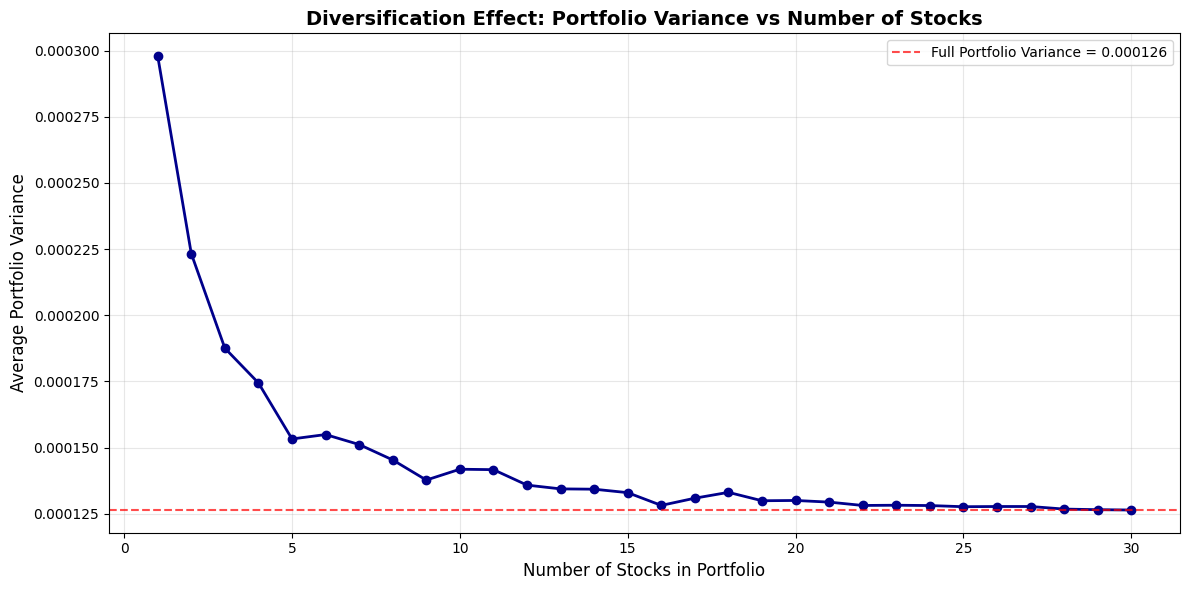


Diversification Benefits:
Variance with 1 stock:  0.000298
Variance with 5 stocks: 0.000153 (48.6% reduction)
Variance with 10 stocks: 0.000142 (52.4% reduction)
Variance with 30 stocks: 0.000126 (57.6% reduction)


In [16]:
import numpy as np

# Diversification analysis - Portfolio variance vs number of stocks
n_reps = 100  # Number of random portfolios to simulate for each size
max_stocks = len(df_daily_ret.columns)

results = []

print("Analyzing diversification benefits...")
print(f"Simulating {n_reps} random portfolios for each size from 1 to {max_stocks} stocks")

for n in range(1, max_stocks + 1):
    var_list = []
    for rep in range(n_reps):
        # Randomly select n stocks
        chosen_stocks = np.random.choice(df_daily_ret.columns, size=n, replace=False)
        
        # Calculate equally weighted portfolio returns for these stocks
        weight = 1 / n
        portfolio_returns = df_daily_ret[chosen_stocks].mul(weight).sum(axis=1)
        
        # Calculate variance
        var_list.append(portfolio_returns.var())
    
    # Store average variance across repetitions
    results.append(np.mean(var_list))

# Plot variance vs portfolio size
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_stocks + 1), results, marker='o', linewidth=2, markersize=6, color='darkblue')
plt.axhline(y=results[-1], color='red', linestyle='--', alpha=0.7, 
            label=f'Full Portfolio Variance = {results[-1]:.6f}')
plt.title("Diversification Effect: Portfolio Variance vs Number of Stocks", fontsize=14, fontweight='bold')
plt.xlabel("Number of Stocks in Portfolio", fontsize=12)
plt.ylabel("Average Portfolio Variance", fontsize=12)
plt.xticks(range(0, max_stocks + 1, 5))
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate variance reduction
print("\nDiversification Benefits:")
print("=" * 50)
print(f"Variance with 1 stock:  {results[0]:.6f}")
print(f"Variance with 5 stocks: {results[4]:.6f} ({(1-results[4]/results[0])*100:.1f}% reduction)")
print(f"Variance with 10 stocks: {results[9]:.6f} ({(1-results[9]/results[0])*100:.1f}% reduction)")
print(f"Variance with {max_stocks} stocks: {results[-1]:.6f} ({(1-results[-1]/results[0])*100:.1f}% reduction)")
print("=" * 50)


## Summary

This notebook implements an **equally weighted portfolio** strategy using 30 stocks from the S&P 500.

### Key Features:
1. **Data Loading**: Uses total return index data from Excel
2. **Portfolio Construction**: Equal allocation (1/30) to each of the 30 stocks
3. **Performance Metrics**: 
   - Annualized returns and volatility
   - Sharpe ratio (risk-adjusted return)
   - Maximum drawdown
   - Annual returns breakdown
4. **Visualizations**:
   - Portfolio value over time
   - Cumulative returns
   - Rolling Sharpe ratio
   - Drawdown analysis
   - Annual returns bar chart
5. **Benchmark Comparison**: Optional comparison with S&P 500
6. **Diversification Analysis**: Shows how portfolio variance decreases as more stocks are added

### Strategy:
The equally weighted approach gives each stock the same weight in the portfolio, regardless of market capitalization. This can lead to better diversification and potentially higher returns compared to market-cap weighted indices, as it provides more exposure to smaller companies.
